In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Importing data
data = pd.read_csv("E-commerce Export.csv")
data.dropna(inplace=True)

# Seeing data
data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Spend_Per_Item,Churn,S_Age,S_TotalSpend,S_ItemsPurchased,S_AverageRating,S_DaysSinceLastPurchase
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,80.014286,0,-0.945143,0.760130,0.337346,1.001981,-0.118361
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,70.954545,0,0.082834,-0.179459,-0.385538,0.139479,-0.639909
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,56.750000,1,1.933194,-0.925570,-0.867461,-1.068024,1.148254
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,77.910526,0,-0.739548,1.756144,1.542153,1.174482,-1.086950
4,106,Female,37,Houston,Bronze,440.80,8,3.1,False,22,Neutral,55.100000,0,0.699621,-1.119048,-1.108422,-1.585526,-0.341882


In [3]:
# Spliting data
male = data[data['Gender'] == 'Male']
female = data[data['Gender'] == 'Female']

neutral = data[data['Satisfaction Level'] == 'Neutral']
satisfied = data[data['Satisfaction Level'] == 'Satisfied']
unsatisfied = data[data['Satisfaction Level'] == 'Unsatisfied']

# EDA

In [4]:
# Looking at the pattern bettew the different satisfaction levels
def pie(df, name):
    nochurn = df.groupby('Churn').count()['Customer ID'][0]
    plt.pie([(len(df) - nochurn), nochurn], labels = ['Churn', 'No Churn'], colors = ['Red', 'Green'])
    plt.title(f'The churn rate when customers where {name}')
    plt.legend()
    plt.show() 

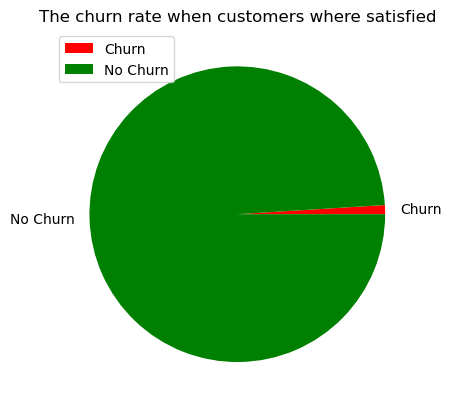

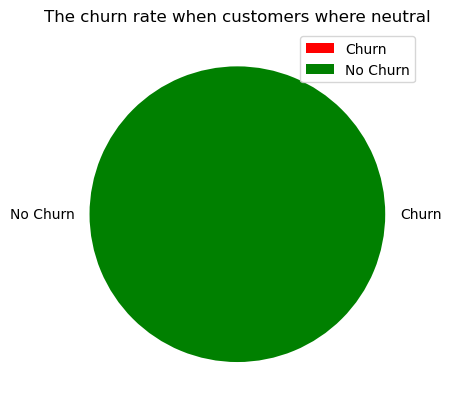

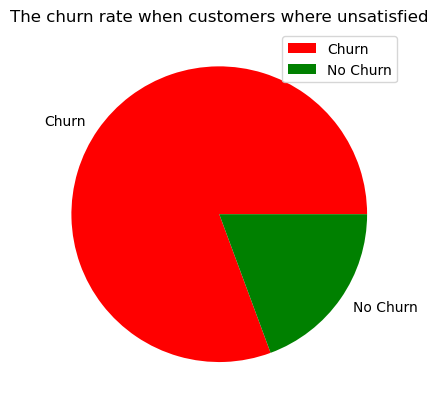

In [5]:
pie(satisfied, 'satisfied')
pie(neutral, 'neutral')
pie(unsatisfied, 'unsatisfied')

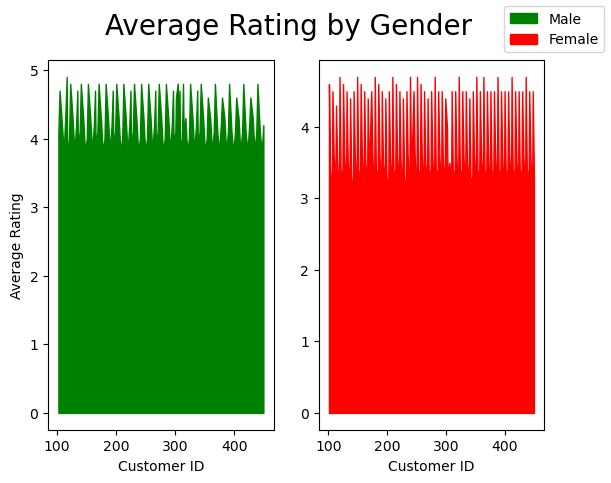

In [6]:
# Area chart
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.fill_between(male['Customer ID'], male['Average Rating'], color='Green', label='Male')
ax2.fill_between(female['Customer ID'], female['Average Rating'], color='Red', label='Female')

ax1.set_xlabel('Customer ID')
ax2.set_xlabel('Customer ID')

ax1.set_ylabel('Average Rating')
fig.suptitle("Average Rating by Gender", fontsize=20)

fig.legend()
plt.show()

In [7]:
# Total Spend vs. Days Since Last Purchase
data[['Churn', 'Total Spend', 'Items Purchased']].corr()

,Churn,Total Spend,Items Purchased
Churn,1.000000,-0.439419,-0.311936
Total Spend,-0.439419,1.000000,0.977593
Items Purchased,-0.311936,0.977593,1.000000


#  Visualize key metrics

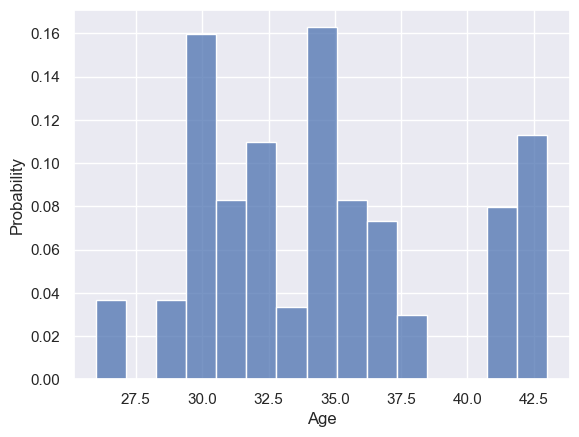

In [8]:
sns.set_theme(style="darkgrid")
sns.histplot(data=data, x='Age', stat = "probability", bins=15)
plt.show()

C:\Users\JaSai\AppData\Local\Temp\ipykernel_33344\4024340723.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='Age', y ='Total Spend', palette='pastel', s=100, color="red")


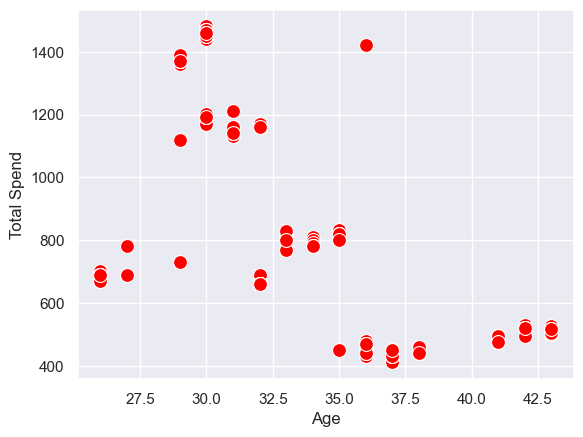

In [9]:
# Age vs. Total Spend
sns.scatterplot(data=data, x='Age', y ='Total Spend', palette='pastel', s=100, color="red")
plt.show()

<Axes: xlabel='Gender', ylabel='Churn'>

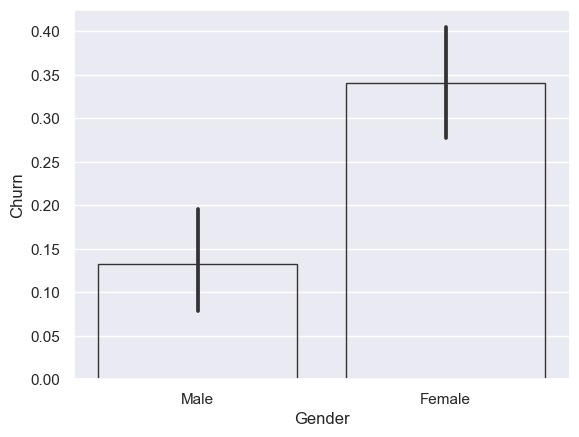

In [10]:
sns.barplot(data=data, x='Gender', y='Churn', facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2", order = ["Male", 'Female'])

In [11]:
# Get the x values
cxlumns = ['Customer ID', 'Gender', 'S_Age', 'City', 'Membership Type', 'S_TotalSpend', 'S_ItemsPurchased', 'S_AverageRating', 
          'Discount Applied', 'Satisfaction Level', 'Spend_Per_Item']
X = data[cxlumns]
le = LabelEncoder()
word = ['Gender', 'City', 'Membership Type', 'Discount Applied', 'Satisfaction Level']
X[word] = X[word].apply(le.fit_transform) 
# Get the y values
y = data['Churn']

C:\Users\JaSai\AppData\Local\Temp\ipykernel_33344\3286981249.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[word] = X[word].apply(le.fit_transform)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [13]:
dtreg = DecisionTreeRegressor()
dtreg.fit(X_train, y_train)
y_pred = dtreg.predict(X_test)
print("Decision Tree Regression model f1(in %):", f1_score(y_test, y_pred) * 100)
print("Decision Tree Regression model recal(in %):", recall_score(y_test, y_pred) * 100)
print("Decision Tree Regression model ROC_AUC(in %):", roc_auc_score(y_test, y_pred) * 100)
print("Decision Tree Regression model accuracy(in %):", accuracy_score(y_test, y_pred) * 100)
print("Decision Tree Regression model precision(in %):", precision_score(y_test, y_pred) * 100)

Decision Tree Regression model f1(in %): 96.0
Decision Tree Regression model recal(in %): 96.0
Decision Tree Regression model ROC_AUC(in %): 97.24242424242424
Decision Tree Regression model accuracy(in %): 97.8021978021978
Decision Tree Regression model precision(in %): 96.0


In [14]:
rfclass = RandomForestClassifier()
rfclass.fit(X_train, y_train)
y_pred = rfclass.predict(X_test)
print("Random Forest Classifier model f1(in %):", f1_score(y_test, y_pred) * 100)
print("Random Forest Classifier model recal(in %):", recall_score(y_test, y_pred) * 100)
print("Random Forest Classifier model ROC_AUC(in %):", roc_auc_score(y_test, y_pred) * 100)
print("Random Forest Classifier model accuracy(in %):", accuracy_score(y_test, y_pred) * 100)
print("Random Forest Classifier model precision(in %):", precision_score(y_test, y_pred) * 100)

Random Forest Classifier model f1(in %): 96.0
Random Forest Classifier model recal(in %): 96.0
Random Forest Classifier model ROC_AUC(in %): 97.24242424242424
Random Forest Classifier model accuracy(in %): 97.8021978021978
Random Forest Classifier model precision(in %): 96.0


In [15]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)
print("Logistic Regression model f1(in %):", f1_score(y_test, y_pred) * 100)
print("Logistic Regression model recal(in %):", recall_score(y_test, y_pred) * 100)
print("Logistic Regression model ROC_AUC(in %):", roc_auc_score(y_test, y_pred) * 100)
print("Logistic Regression model accuracy(in %):", accuracy_score(y_test, y_pred) * 100)
print("Logistic Regression model precision(in %):", precision_score(y_test, y_pred) * 100)

Logistic Regression model f1(in %): 96.0
Logistic Regression model recal(in %): 96.0
Logistic Regression model ROC_AUC(in %): 97.24242424242424
Logistic Regression model accuracy(in %): 97.8021978021978
Logistic Regression model precision(in %): 96.0


C:\Users\JaSai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
gbclass = GradientBoostingClassifier()
gbclass.fit(X_train, y_train)
y_pred = gbclass.predict(X_test)
print("Gradient Boosting Classifier model f1(in %):", f1_score(y_test, y_pred) * 100)
print("Gradient Boosting Classifier model recal(in %):", recall_score(y_test, y_pred) * 100)
print("Gradient Boosting Classifier model ROC_AUC(in %):", roc_auc_score(y_test, y_pred) * 100)
print("Gradient Boosting Classifier model accuracy(in %):", accuracy_score(y_test, y_pred) * 100)
print("Gradient Boosting Classifier model precision(in %):", precision_score(y_test, y_pred) * 100)

Gradient Boosting Classifier model f1(in %): 96.0
Gradient Boosting Classifier model recal(in %): 96.0
Gradient Boosting Classifier model ROC_AUC(in %): 97.24242424242424
Gradient Boosting Classifier model accuracy(in %): 97.8021978021978
Gradient Boosting Classifier model precision(in %): 96.0


In [17]:
parameters = {"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2], 
              "random_state": [0, 25, 50, 75, 100, 125, 150, 175, 200]}
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'random_state': [0, 25, 50, 75, 100, 125, 150, 175,
                                          200]})

In [18]:
print(clf.score(X_train, y_train))
print(clf.best_params_)

0.9904761904761905
{'learning_rate': 0.01, 'random_state': 0}


# Cross-validation

In [19]:
kf = KFold(n_splits=5, shuffle=True, random_state=250)
cross_val_results = cross_val_score(GradientBoostingClassifier(learning_rate=0.01, random_state=0), X, y, cv=kf)

print(f'Mean Accuracy: {cross_val_results.mean()}')
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')

Mean Accuracy: 0.9833333333333334
Cross-Validation Results (Accuracy): [1.         0.98333333 0.93333333 1.         1.        ]


# Deployment

In [20]:
def deployment(file):
    data = pd.read_csv(file)
    cxlumns = ['Customer ID', 'Gender', 'S_Age', 'City', 'Membership Type', 'S_TotalSpend', 'S_ItemsPurchased', 'S_AverageRating', 
               'Discount Applied', 'Satisfaction Level', 'Spend_Per_Item']
    X = data[cxlumns]
    word = ['Gender', 'City', 'Membership Type', 'Discount Applied', 'Satisfaction Level']
    X[word] = X[word].apply(le.fit_transform) 
    y = data['Churn']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
    gbclass = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
    gbclass.fit(X_train, y_train)
    y_pred = gbclass.predict(X_test)
    result = pd.DataFrame({'Prediction' : y_pred, 'Real' : y_test})
    return result

In [21]:
deployment("E-commerce Export.csv")

C:\Users\JaSai\AppData\Local\Temp\ipykernel_33344\3518635520.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[word] = X[word].apply(le.fit_transform)


,Prediction,Real
281,0,0
81,0,0
40,0,0
175,1,1
58,0,0
...,...,...
114,0,0
180,0,0
200,0,0
30,1,1
